In [1]:
import sqlite3
con = sqlite3.connect("pipeline_data.db")
cur = con.cursor()

result = cur.execute("SELECT name FROM pipeline").fetchall()
run_names = [r[0] for r in result]
print(run_names)

['cuda-image', 'python-image']


In [48]:
data = dict()

result = cur.execute("SELECT pipelinename, documentSize, durationAnnotator FROM pipeline_document_perf " + 
                  "WHERE durationDeserialize=0 ORDER BY documentSize").fetchall()

document_sizes_dict = dict()
for pipelinename, documentSize, _ in result:
    if pipelinename not in document_sizes_dict:
        document_sizes_dict[pipelinename] = set()
    document_sizes_dict[pipelinename].add(documentSize)    

for pipelinename, document_size, duration_annotator in result:

    for document_sizes in document_sizes_dict.values():
        if document_size not in document_sizes:
            break
    else:
        if pipelinename not in data:
         data[pipelinename] = [[],[]]
        data[pipelinename][0].append(document_size)
        data[pipelinename][1].append(duration_annotator)

print(data)

{'python-image': [[4357, 6630, 9448, 14309, 99691, 122215, 149214, 202399, 214300, 223018, 293960, 312914, 318386, 320147, 331254, 336663, 337333, 346411, 355831, 362606, 377030, 384102, 385640, 395525, 396548, 406457, 408633, 410473, 416394, 417213, 418728, 419247, 421808, 429876, 434458, 439735, 445104, 445572, 447160, 447861, 448866, 449416, 450844, 452166, 453906, 456959, 457196, 459620, 463927, 468524, 468561, 470484, 471255, 479781, 482270, 482715, 485989, 488911, 491450, 494852, 495251, 502293, 525324, 540717, 546038, 586339, 593899, 596776, 599622], [13974681, 22037713, 18588035, 29091190, 249408294, 222616791, 322740849, 423414046, 426835092, 466548409, 579416175, 614909977, 623627857, 642815886, 679896649, 673251419, 659415181, 725615855, 697201505, 749021348, 731678012, 771630199, 779889729, 884376569, 1137195822, 820866464, 839296143, 878804707, 869240307, 797741298, 830912685, 829497059, 857153204, 848913291, 945264349, 883712101, 950263245, 919492655, 896045506, 903454339

In [18]:
for run_name in data:
    print(len(data[run_name][0]))
    

69
69


In [71]:
run_names = list(data.keys())
number_of_datapoints = len(data[run_names[0]][0])

for head in ["document size"] + run_names:
    print(head, end="\t")
print()

sums = {run_name: 0 for run_name in run_names}
for i in range(number_of_datapoints):
    current_document_size = -1

    document_size = data[run_names[0]][0][i]
    print(format(document_size, ","), end="\t\t")
    
    for run_name in run_names:
        duration_annotator = data[run_name][1][i]
        sums[run_name] += duration_annotator
        print(format(duration_annotator, ","), end="\t")
        
    print()

print("Summe:" , end="\t\t")
for run_name in run_names:
    print(format(sums[run_name], ","), end="\t")

document size	python-image	cuda-image	
4,357		13,974,681	9,397,815	
6,630		22,037,713	13,968,977	
9,448		18,588,035	27,557,250	
14,309		29,091,190	29,588,503	
99,691		249,408,294	199,813,494	
122,215		222,616,791	221,575,820	
149,214		322,740,849	318,856,058	
202,399		423,414,046	391,451,470	
214,300		426,835,092	414,330,764	
223,018		466,548,409	471,113,924	
293,960		579,416,175	600,014,352	
312,914		614,909,977	647,644,321	
318,386		623,627,857	647,424,775	
320,147		642,815,886	650,696,535	
331,254		679,896,649	658,026,711	
336,663		673,251,419	683,473,056	
337,333		659,415,181	683,712,220	
346,411		725,615,855	703,801,148	
355,831		697,201,505	726,847,789	
362,606		749,021,348	783,927,171	
377,030		731,678,012	755,069,778	
384,102		771,630,199	740,875,818	
385,640		779,889,729	785,209,548	
395,525		884,376,569	802,915,469	
396,548		1,137,195,822	1,111,315,401	
406,457		820,866,464	813,524,895	
408,633		839,296,143	842,959,821	
410,473		878,804,707	880,719,348	
416,394		869,240,307	8

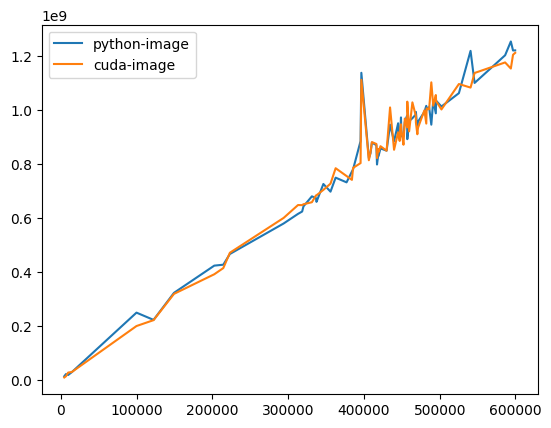

In [76]:
import matplotlib.pyplot as plt

for run_name in data:
    plt.plot(data[run_name][0], data[run_name][1], label=run_name)
plt.legend()
plt.show()

In [75]:
result = cur.execute("SELECT * FROM pipeline_perf").fetchall()
for run_name, start_time, end_time in result:
    print(run_name, (end_time-start_time)/1000)

'100,000,000'